# Daten: Import, Verarbeitung und Visualisierung
Willkommen zurück! In diesem Notebook soll es um Daten gehen, denn das ist das A und O im maschinellen Lernen. Die Qualität und Struktur der Daten, auf deren Basis ein Modell trainiert wird, können einen direkten Einfluss auf dessen Leistungsfähigkeit haben. Kurz gesagt: Ein Modell ist nur so gut wie die Daten, mit denen es trainiert wurde.

## Ziele:
In diesem Notebook wollen wir euch in die Grundlagen des Datenimports, der Vorverarbeitung (des sogenannten Preprocessing) und der Analyse von Daten einführen. Wir werden dafür Bibliotheken wie `pandas`, `numpy` und `seaborn` kennenlernen und unser Wissen direkt an einem simplen Modell für die Vorhersage einer binären Variable (wahr oder falsch) testen.

# Numpy, pandas und seaborn

Wie bereits im ersten Notebook erwähnt, wird für das Erstellen von leistungsstarken Programmen oft auf externe Bibliotheken zurückgegriffen. Es ist schlicht einfacher, vorgefertigte und vielfach optimierte Grundfunktionen zu importieren als das Rad komplett neu zu erfinden.

- Für Datenverarbeitung unumgänglich ist zum Beispiel die Bibliothek **`pandas`**. Das `pandas` DataFrame-Objekt, ein fancy Name für ein Array mit einem Titel, liefert höchst effiziente Methoden, um Daten aus gängigen Formaten zu lesen, sie umzuformen, zu indexieren, zu sortieren und fehlende Einträge zu behandeln. All das selbst zu schreiben wäre ein riesiger Aufwand, der für jedes Projekt neu anfallen würde.

- Für häufig verwendete Methoden, die man auf Arrays anwenden will, wie das Maximum, Minimum oder den Mittelwert finden, ist **`NumPy`** die erste Wahl. Aber auch fortgeschrittene Operationen wie Vektorisierung, Skalarprodukte, Zufallszahlengeneratoren, zahlreiche mathematische Funktionen und Konstanten sowie Solver für Gleichungssysteme sind dort integriert und machen `NumPy` unersetzlich für mathematische Operationen mit Arrays.

- Zuletzt ist es oft sinnvoll, sich Daten zu veranschaulichen, um ein Gefühl für Verteilungen, Ausreißer und fehlende Daten zu bekommen. Dafür ist **`seaborn`** sehr gut geeignet. Es ist eine auf Matplotlib (manche werden es kennen) basierte statistische Datenvisualisierungs-Bibliothek und kommt mit vielen nützlichen Features wie Korrelationsmatrizen, Distributionsplots, automatischen Unsicherheitsberechnungen, etc... - und das oft nur mit einer Zeile Code!

Für einen ersten Eindruck all dieser Bibliotheken werden wir uns an ein Beispiel wagen, anhand dessen wir die oben genannten Funktionalitäten direkt aus erster Hand sehen können.

## Der Titanic-Datensatz
Der Titanic-Datensatz umfasst interessante Daten aller Passagiere, die auf der schicksalhaften Reise der RMS Titanic 1912 an Bord waren und bietet eine gute Möglichkeit, die Funktionen von den obigen Bibliotheken zu erkunden. Bevor wir die Passagierdaten herunterladen können müssen wir unsere Bibliotheken importieren. Standardmäßig werden als Alias für `numpy`, `pandas` und `seaborn` die Kürzel `np`, `pd` und `sns` gewählt.
Wir importieren darüber hinaus `matplotlib.pyplot` als `plt`, worauf Seaborn im Hintergrund basiert, um unsere Plots bearbeiten zu können.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Datenimport
Der Import von Daten ist nun sehr einfach, denn dafür bietet uns `pandas` direkt einige Funktionen. Zum Beispiel wird der Original-Titanic-Datensatz als CSV-Datei öffentlich von seaborn bereitgestellt. CSV-Dateien (für **c**omma **s**eparated **v**alues) sind ein sehr gängiges Datenformat und werden neben Excel-Dateien häufig gebraucht. Die Vorteile von CSV-Dateien sind die geringeren Dateigrößen sowie der unkomplizierte Austausch über verschiedene Betriebssysteme und Applications hinweg. Eine CSV-Datei sieht im Rohformat etwa so aus:

```
column1, column2, column3
entry11, entry21, entry31
entry12, entry22, entry32
...
```
Sie besteht also aus der ersten Zeile, die alle Spaltennamen beinhaltet, und dann aus beliebig vielen Zeilen von Einträgen, die durch Kommas getrennt werden.
Wir können unsere Datei nun importieren, indem wir `pandas`' `read_csv`-Funktion benutzen und als Argument den Link, unter dem die Datei bereitsestellt wird, angeben. Das ganze speichern wir als unseren ersten DataFrame `df` ab.



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

Anstatt Daten aus dem Internet zu laden, könnt ihr auch Daten, die sich lokal auf eurem Computer befinden, importieren. Außerdem werden auch andere Formate unterstützt. Ein weiteres gängiges Format ist natürlich das xls-Format. Stellen wir uns vor, dass ihr lokal eine Excel-Datei habt, die den Titanic-Datensatz beinhaltet. Diese Daten könntet ihr dann ganz einfach wie folgt einlesen:

```
df_xls = pd.read_excel('pfad-zu-meiner-xls-datei/dateiname.xls')
```

# Explorative Datenanalyse


## DataFrame-Attribute
Okay, die Daten sind jetzt also importiert, aber wir haben keine Ahnung, was sie eigentlich beinhalten. Lasst uns erstmal schauen, was für eine Form unsere Daten haben. Das machen wir, indem wir das Attribut `shape` unseres DataFrames inspizieren.

In [3]:
print(df.shape)

(891, 15)


Wir haben also 891 Zeilen und 15 Spalten. Was für Informationen stehen in den Spalten? Das können wir mit dem DataFrame-Attribut `columns` einsehen:

In [4]:
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


Viele dieser Spaltennamen sind selbsterklärend (age, sex, survived, fare), aber es gibt auch einige Spalten, deren Bedeutung nicht direkt offensichtlich ist. Diese werden wir uns gleich genauer anschauen.

Eine kurze Anmerkung zu Attributen:\
Attribute in Python sind Eigenschaften eines Objekts, die uns Informationen über das Objekt liefern. Objekte in Python sind einzelne Instanzen von Klassen. Was heißt das? Wenn ich eine Viererpackung Äpfel kaufe, habe ich vier Instanzen der Klasse 'Apfel'. Diese Äpfel haben unterschiedliche Eigenschaften, darunter beispielsweise das Gewicht. Der eine Apfel wiegt 250g, ein anderer wiegt 227g. Ganz analog ist jeder _einzelne_ DataFrame, den ich erstelle, eine Instanz der übergeordneten _Klasse_ DataFrame, und jede dieser Instanzen hat Eigenschaften, die sich in der Coding-Lingo _Attribute_ nennen.
Ein DataFrame in Pandas hat mehrere nützliche Attribute, wie
- columns (Spaltennamen),
- index (Zeilenbeschriftungen),
- dtypes (Datentypen der Spalten),
- shape (Größe des DataFrame),
- size (Anzahl der Elemente), und
- values (zugrunde liegende Daten).

Sie können wie oben gezeigt über die Schreibweise `data_frame_name.attribute_name` aufgerufen werden. Zusammenfassend also: Attribute sind Eigenschaften von Objekten, die diese beschreiben und Informationen über sie enthalten. Sie sind im Wesentlichen Variablen, die an ein Objekt gebunden sind und durch Punktnotation (.) abgerufen oder gesetzt werden können.



## Inspektion von DataFrames
Wir wissen jetzt theoretisch, was in den Spalten unseres DataFrames stehen sollte, aber einige Spaltennamen sind uns noch nicht ganz klar. Um uns eine Kostprobe eines DataFrames auszugeben, können wir die Methoden `.head()` und `.tail()` verwenden:

In [5]:
df.head()  # Gibt standardmäßig die ersten 5 Zeilen aus

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail(10) # Das Argument in den Klammern ändert die Anzahl der ausgegebenen Zeilen

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


Wenn man die Daten so sieht kann man sich viele Bedeutungen der Spaltennamen erschließen. 'pclass' scheint für passenger class zu stehen, 'embarked' scheint ein Kürzel für den Abreisehafen zu sein und 'adult_male' steht wohl dafür, ob ein Passagier ein erwachsener Mann war. Die restlichen zwei 'sibsp' und 'parch' kläre ich an dieser Stelle mal auf: Sie stehen für die Anzahl an Geschwistern und Ehegatten (siblings/spouses), bzw. für die Anzahl an Eltern und Kindern (parents, children) des jeweiligen Passagiers, die sich auch an Bord befanden.

Mit der `.info()`-Methode können wir uns einige nützliche Werte des DataFrames anzeigen lassen wie die gesamte Anzahl der Zeilen, die Spaltennamen und die Datentypen der einzelnen Spalten.

In [8]:
df.info()  # Überblick über Datentypen und fehlende Werte

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Besonders interessant ist hier aber die Anzahl der Einträge pro Spalte, die '`non-null`' sind. `Non-null`bedeutet dabei, dass die Einträge vorhanden sind. Fehlende Einträge werden beim Import automatisch (je nach Datentyp) durch `NaN` (= Not a Number) oder Python's natives `None` ersetzt. Diese beiden Datentypen gelten für pandas als `null`, also als fehlend.

Zu guter Letzt können wir uns direkt interessante Statistiken wie Durchschnitte, Maxima, Minima und Perzentile von numerischen Spalten anschauen, indem wir die `describe()`-Methode verwenden:

In [9]:
display(df.describe())

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Tabellen sind schön, und mit den Minima und Maxima können wir vielleicht noch direkt etwas anfangen, aber um ein Gefühl für die Verteilung zu bekommen, können wir das Ganze auch mit seaborn plotten. Na? Wer erinnert sich noch an [Boxplots](https://en.wikipedia.org/wiki/Box_plot#Elements)?

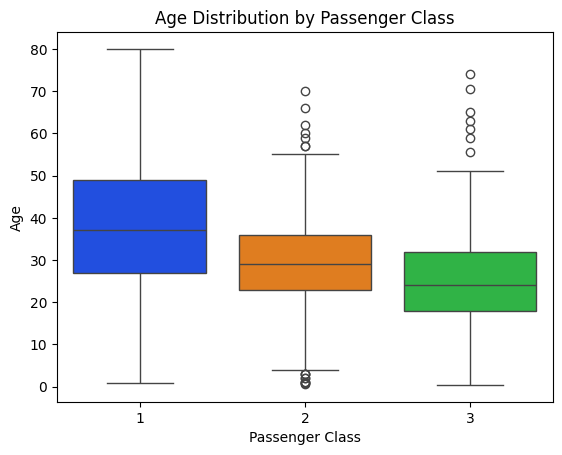

In [10]:
sns.boxplot(x = 'pclass', y = 'age', data = df, palette='bright')

plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

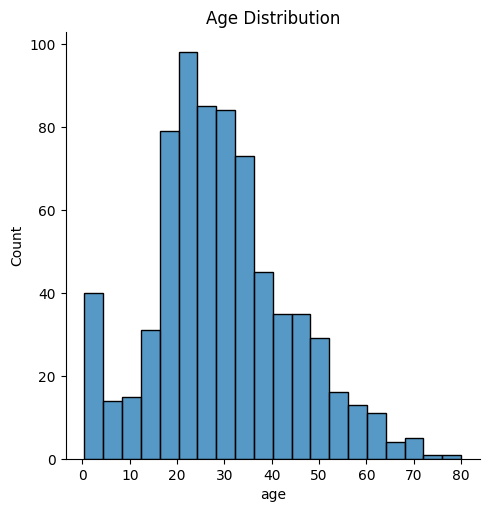

In [11]:
# Oder als Histogramm
sns.displot(df['age'])

plt.title('Age Distribution')
plt.show()

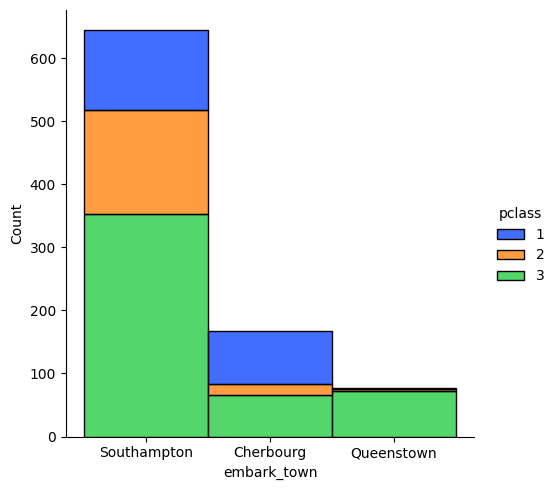

In [ ]:
# Histogramme funktionieren auch für kategorische Werte und können mit einer Vielzahl von keywords (hue, multiple, ...) modifiziert werden
sns.displot(df, x='embark_town', hue='pclass', palette = 'bright', multiple = 'stack')

Für einen tieferen Einblick in die Möglichkeiten, mit `displot` in seaborn Verteilungen darzustellen, schaut [hier](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) vorbei.

<a id='fehlende-werte'></a>

## Fehlende Werte

Wir haben bereits festgestellt, dass einige Spalten fehlende Werte enthalten, als wir den Befehl `df.info()` ausgeführt haben. Um diese genauer zu analysieren, nutzen wir die Funktion `isnull()` in Kombination mit `sum()`:




In [13]:
missing_values = df.isnull().sum()
print(missing_values)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Wir können uns die fehlenden Werte auch als relativen Anteil am gesamten Datensatz ausgeben lassen:
missing_values_relative = df.isnull().sum() / df.shape[0]
print(missing_values_relative)

# Bemerkung: df.shape ist ein Tupel (Zeilen, Spalten). Der Index 0 greift also auf die Anzahl der Zeilen zu.

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64


 Gleich zu Beginn sehen wir, dass fast 80% der Einträge der Spalte 'deck' vom Typ `null` sind. Würden wir ein Modell trainieren wollen, das uns auf Basis von verschiedenen Features vorhersagt, wie hoch die Überlebenswahrscheinlichkeit einer Person ist, dann wäre das Feature 'deck' definitiv nicht das geeignetste, denn es deckt nur einen sehr kleinen Anteil vom gesamten Datensatz ab und könnte uns wichtige Abhängigkeiten zwischen den Features gänzlich verschweigen. Wir behalten es für den Moment dennoch im Datensatz, da wir uns bis jetzt nur in der Inspektionsphase befinden.

 Andererseits fehlen 'nur' knapp 20% der Einträge der Spalte 'age'. Wir können davon ausgehen, dass die ungefähre Altersverteilung der Passagiere durch die vorhandenen 80% ausreichend gut abgebildet wird. Allerdings müssen wir uns im nächsten Schritt (Datenbereinigung) überlegen, wie mit den fehlenden Werten umzugehen ist. Das gleiche gilt auch für die fehlenden Werte von 'embarked' und 'embark_town'. Moment! 'Embarked' und 'embark_town' klingt doch ziemlich nach der gleichen Sache? Und sie haben die gleiche Anzahl an fehlenden Werten...




## Duplikate

### Doppelte Spalten
Genau wie Werte fehlen können, können sie in einem Datensatz auch doppelt vorliegen. Bei näherer Betrachtung unserer Daten ist es offensichtlich, dass einige Spalten eigentlich überflüssig sind. Beispielsweise benötigen wir nur eine der Spalten 'embarked' und 'embark_town', da sie (mutmaßlich) die gleichen Informationen beinhalten. Das gleiche gilt vermutlich für einige weitere Spalten ('class'/'pclass' und 'alive'/'survived').
Bevor wir aber diese Spalten permanent löschen, überprüfen wir lieber unsere Hypothese. Dafür brauchen wir drei Zutaten:

In [14]:
# 1. Mit eckigen Klammern und dem Spaltennamen können wir einzelne Spalten des DataFrames betrachten:
pclass = df['pclass']
pclass.head(10)

,pclass
0,3
1,1
2,3
3,1
4,3
5,3
6,1
7,3
8,3
9,2


In [16]:
# 2. Mit der Funktion nunique() zählen wir wie viele verschiedene Werte in einer DataFrame-Spalte vorhanden sind (hier 3 für Klassen '1', '2' und '3')
num_pclass = df['pclass'].nunique()
print(num_pclass)

3


In [17]:
# 3. Nun können wir dieses Ergebnis auch nach anderen Features gruppieren.
# Hiermit geben wir die Anzahl der verschiedenen Werte für 'class' nach dem Feature 'deck' gruppiert aus:
deck_class = df.groupby('deck')['class'].nunique()
display(deck_class)

,class
deck,
A,1
B,1
C,1
D,2
E,3
F,2
G,1


In [18]:
# Wir sehen, dass auf Decks A, B, C und G nur eine Klasse vertreten ist, auf Deck D und F zwei Klassen und auf Deck E gleich drei.
# Wir können auch sehen, welche Klassen das sind, indem wir nicht nur zählen (wie mit .nunique()), sondern gleich die
# verschiedenen Werte ausgeben. Das machen wir einfach mit .unique():
deck_class = df.groupby('deck')['class'].unique()
display(deck_class)

,class
deck,
A,[First]
B,[First]
C,[First]
D,"[Second, First]"
E,"[First, Second, Third]"
F,"[Second, Third]"
G,[Third]


In [19]:
# Die Decks A bis C waren also nur für Passagiere der ersten Klasse und Decks D, E und F wurden sich geteilt,
# während Deck G nur für Passagiere der Klasse drei war.
# Jetzt haben wir alle Zutaten zusammen, um herauszufinden, ob 'class' und 'pclass' die gleichen Daten re-
# präsentieren, wenn wir nämlich jetzt alle verschiedenen Einträge der Spalte 'pclass' nach der Spalte
# 'class' gruppieren:

class_pclass = df.groupby('class')['pclass'].unique()
display(class_pclass)

,pclass
class,
First,[1]
Second,[2]
Third,[3]


Wir sehen also, dass eine Kategorie von 'pclass' (1, 2 und 3) immer nur Einträge genau einer Kategorie von 'class' (First, Second, Third) hat.
Das gleiche gilt übrigens auch für die Paare 'alive'/'survived' und 'embarked'/'embark_town'.

In [21]:
alive_survived = df.groupby('alive')['survived'].unique()
display(alive_survived.head())

embarked_embarktown = df.groupby('embarked')['embark_town'].unique()
display(embarked_embarktown.head())

,survived
alive,
no,[0]
yes,[1]


,embark_town
embarked,
C,[Cherbourg]
Q,[Queenstown]
S,[Southampton]


Damit können wir guten Gewissens die Spalten 'class', 'alive' und 'embark_town' aus dem DataFrame entfernen, da ihre Daten schon in 'pclass', 'survived' und 'embarked' enthalten sind. Damit sind wir beim nächsten Punkt der Datenverarbeitung gelandet.

## Aufgaben:
- Wähle eine numerische Spalte und analysiere deren Verteilung, indem du sowohl ein Histogramm als auch einen Boxplot erstellst. Füge dann eine Analyse hinzu, die die wichtigsten Merkmale der Verteilung (z.B. Schiefe, Ausreißer) beschreibt.
- Wie unterscheidet sich der durchschnittliche Fahrpreis (Spalte fare) zwischen den Passagierklassen (pclass)? Nutze hierfür die groupby()-Funktion und berechne den Durchschnitt für jede Klasse. Stelle dein Ergebnis auch als `displot` dar.
- Stelle eine [Korrelationstabelle](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr) der numerischen Variablen im Titanic-Datensatz zusammen. Gibt es starke Korrelationen zwischen bestimmten Features (z.B. zwischen fare und pclass)? Visualisiere die Korrelationen als [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

# Datenbereinigung

### Doppelte Spalten löschen
Wir wollen nun also die Spalten 'class', 'alive' und 'embark_town' aus unserem DataFrame löschen. Wie machen wir das? So:

In [22]:
df = df.drop(columns=['class', 'alive', 'embark_town'])

Weiterhin werden wir die Spalten 'adult_male' und 'who' entfernen, da sie sich aus 'sex' und 'age' ergeben, genauso wie die Spalte 'alone', da sie sich aus 'sibsp' und 'parch' ergibt. (Macht euch klar, warum das so ist.)

In [23]:
df = df.drop(columns=['adult_male', 'alone', 'who'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


### Doppelte Werte löschen

Genau wie es ganze Spalten geben kann, die überflüssig sind, kann es auch einzelne Zeilen geben, die mehrfach vorkommen. Hier sollte unterschieden werden zwischen "echten" und "falschen" Duplikaten. Es handelt sich um echte Duplikate, wenn ein und derselbe Messwert zweimal im Datensatz vorkommt. Hätte beispielsweise jeder Passagier eine ID, dann wäre ein echtes Duplikat, wenn der Eintrag mit der ID #407 zweimal vorkäme. Unechte Duplikate sind solche, die in allen Features übereinstimmen, aber trotzdem zu verschiedenen Messpunkten gehören. In unserem Beispiel wäre das der Fall, wenn die Personen mit den IDs #099 und #313 beide weiblich, 29 Jahre alt, ..., und in Queenstown zugestiegen wären. \
Echte Duplikate sind in jedem Fall zu vermeiden, da sie nicht die Realität widerspiegeln und die Daten verzerren. Es kann aber sinnvoll sein, je nachdem für welchen Zweck die Daten eingesetzt werden, unechte Duplikate entweder zu behalten oder zu entfernen. Grob gesagt: Wenn ein Modell die tatsächliche Verteilung der Verhältnisse und Häufigkeiten widerspiegeln soll, dann solltest du auch diese 'unechten' Duplikate behalten. Wenn allerdings allein die Beziehungen zwischen den Features relevant sind, ohne dabei auf die Häufigkeiten zu achten, dann solltest du auch diese 'unechten' Duplikate entfernen.
Wir werden für unseren Anwendungsfall einmal demonstrieren, wie das geht.

In [24]:
duplicate_rows = df.duplicated()           # Duplikate identifizieren. Erstellt einen DataFrame, der die gleiche Größe wie das Original hat mit
                                           # den Einträgen True oder False, je nachdem ob eine Zeile ein Duplikat einer vorherigen Zeile ist.

duplicate_rows_sum = df.duplicated().sum() # Anzahl der Duplikate

print(duplicate_rows)
print(f'Anzahl doppelter Zeilen: {duplicate_rows_sum}')

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool
Anzahl doppelter Zeilen: 107


In [25]:
df.drop_duplicates(inplace=True) # Duplikate werden mit drop_duplicates() gelöscht
print(df.shape)

(784, 9)


### Mit fehlenden Daten umgehen

Erinnern wir uns an die Spalten mit den fehlenden Werten. Wie bereits festgestellt ist die Spalte 'deck' für unsere Zwecke nicht zu gebrauchen. Dafür beinhaltet sie einfach zu wenige Daten. Es ist also durchaus gerechtfertigt, sie aus unserem Datensatz zu entfernen. Besser keine Daten als schlechte Daten! Eine erste Methode, um mit *vielen* fehlenden Daten umzugehen ist also, sie ganz auszuschließen.

In [26]:
df = df.drop(columns = 'deck')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Es gab weiterhin eine Spalte, die nur zwei fehlende Werte hatte: 'embarked'. Eine so geringe Anzahl an Werten (0,002% des Gesamtdatensatzes) hat keinen großen Einfluss auf die gesamte Verteilung. Daher können die in Frage kommenden Zeilen einfach entfernt werden. Eine zweite Art mit *wenigen* fehlenden Daten umzugehen ist also, sie auszuschließen.

In [27]:
display(df[df['embarked'].isnull()])          # Die Zeilen ohne Eintrag in 'embarked'
indices = df[df['embarked'].isnull()].index   # Die dazugehörigen Indizes
print(indices)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


Index([61, 829], dtype='int64')


In [28]:
# Löschen der Zeilen
df = df.drop([61, 829])
print(df.shape)

(782, 8)


Die dritte Spalte mit fehlenden Werten ist 'age'. Da allerdings nur rund 20% der Werte fehlen, können wir dieses Feature grundsätzlich behalten, denn es ist immer noch recht aussagekräftig. Da wir aber für die meisten Anwendungen des Machine Learnings Einträge vom Typ `null` durch echte Zahlen ersetzen müssen, müssen wir uns überlegen, was wir mit den fehlenden Werten tun. Es wäre vorteilhaft, sie durch Werte zu ersetzen, die uns die gesamte Altersverteilung nicht verzerren. Gleichzeitig kann man davon ausgehen, dass die fehlenden 20% _ungefähr_ den gleichen Altersdurchschnitt haben wie die restlichen 80%. Eine sinnvolle Möglichkeit, um mit *einigen* fehlenden Daten umzugehen, wäre also sie durch den Durchschnitt der vorhandenen Daten zu ersetzen.

In [29]:
# Fehlende Alterswerte mit dem Mittelwert auffüllen
df['age'].fillna(df['age'].mean(), inplace=True)

## Aufgaben:
- Experimentiere damit, die fehlenden Werte in der 'age'-Spalte mit dem Median anstelle des Durchschnitts zu ersetzen. Vergleiche die Ergebnisse, indem du die Verteilungen mit seaborn plottest.
- Erstelle eine Funktion, die alle fehlenden Werte in einem DataFrame auf verschiedene Arten behandeln kann (z.B. Entfernen, Ersetzen mit Mittelwert, Ersetzen mit Median). Teste die Funktion auf dem Titanic-Datensatz und vergleiche die Ergebnisse.

# Feature Engineering:
Feature Engineering ist der Prozess der Auswahl, Erstellung und Transformation von Features aus Rohdaten, um die Leistung von Machine Learning-Modellen zu verbessern. Es ist ein entscheidender Schritt in der Datenvorverarbeitung, der oft darüber entscheidet, wie gut ein Modell performt. Dazu gehören beispielsweise Methoden wie One-Hot-Encoding, Standardisierung oder die Erstellung neuer, aussagekräftigerer Features aus bereits vorhandenen.

## One-Hot-Encoding

*Was ist das Besondere an den Spalten 'embarked' und 'sex'?* \
Es sind kategorische Daten, also Daten, die diskrete Kategorien repräsentieren.
Viele Algorithmen erwarten, dass die Eingabedaten numerisch sind, und können nicht direkt mit kategorischen Variablen arbeiten. One-Hot-Encoding löst dieses Problem, indem es jede Kategorie einer kategorischen Spalte (Cherbourg, Queenstown, ...) in eine separate binäre Spalte umwandelt. One-Hot-Encoding ist also eine Methode, um kategorische Daten in eine numerische Form umzuwandeln, die von Machine Learning-Modellen verstanden werden kann.

Warum braucht man One-Hot-Encoding? \
Zunächst einmal gibt es Kategorien, die nicht numerisch sind. Mit Strings kann man aber leider nicht rechnen, deswegen müssen wir nicht-numerische kategorische Variablen in Zahlen umwandeln.
Kategorische Variablen können weiterhin nicht direkt von Machine Learning-Modellen verwendet werden, weil sie nicht auf numerischen Relationen basieren. Ein typisches Beispiel ist die Spalte 'embarked', die die Abfahrtshäfen angibt ('C' für Cherbourg, 'Q' für Queenstown und 'S' für Southampton).

Wenn du versuchst, solche kategorischen Variablen als numerische Werte zu behandeln (z.B. 'C' = 0, 'Q' = 1, 'S' = 2), könnte das Modell annehmen, dass es eine Ordnung oder eine numerische Beziehung zwischen den Kategorien gibt, was aber nicht korrekt ist. In Wirklichkeit gibt es keine sinnvolle numerische Beziehung zwischen 'C', 'Q' und 'S'. Daher verwenden wir One-Hot-Encoding, um die Unterschiedlichkeit der Kategorien zu kodieren, ohne eine Reihenfolge oder Beziehung anzunehmen.

Wie funktioniert One-Hot-Encoding? \
One-Hot-Encoding wandelt jede Kategorie in eine eigene binäre Spalte um. Jede dieser Spalten repräsentiert eine Kategorie, und für jeden Datenpunkt wird in der entsprechenden Spalte eine 1 (oder True) gesetzt, um die Zugehörigkeit zur Kategorie zu markieren, während die restlichen Spalten den Wert 0 (oder False) haben. Aus einer kategorischen Variablen mit drei möglichen Werten werden also beispielsweise drei separate Variablen, jeweils mit den möglichen Werten 0 und 1. Konkret lässt sich das in Pandas mit der Funktion `get_dummies()` machen:

In [30]:
# One-Hot-Encoding der kategorischen Variablen 'embarked' und 'sex'
df_encoded = pd.get_dummies(df, columns=['embarked', 'sex'])

display(df_encoded.head())

,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,0,3,22.0,1,0,7.2500,False,False,True,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,True,False
2,1,3,26.0,0,0,7.9250,False,False,True,True,False
3,1,1,35.0,1,0,53.1000,False,False,True,True,False
4,0,3,35.0,0,0,8.0500,False,False,True,False,True


Wie zu sehen ist, gibt es jetzt die zusätzlichen Spalten 'embarked_Q', 'embarked_S' und 'embarked_C' sowie 'sex_male' und 'sex_female'. In diesen Spalten sind die Einträge entweder True (=1) oder False (=0).

Es stellen sich jetzt aber zwei Fragen:
1. Wieso müssen wir die kategorischen Variablen 'survived' und 'pclass' nicht one-hot-encoden?
2. Brauchen wir wirklich alle binären Spalten, die durch das One-Hot-Encoding entstanden sind?

Zunächst zu Frage 1:
- `survived` ist zwar eine kategorische Variable, aber sie ist bereits eine binäre Variable (0 oder 1), was perfekt für Machine Learning-Modelle (wie logistische Regression) ist. Eine binäre Variable braucht nicht weiter in mehrere Spalten zerlegt zu werden.
Wenn du One-Hot-Encoding anwendest, würdest du zwei Spalten erstellen:
Eine Spalte für "hat nicht überlebt" (0) und eine Spalte für "hat überlebt" (1). Das bringt keinen Mehrwert, da die Information bereits durch eine einzelne binäre Variable kodiert ist.
- `pclass` ist nicht wirklich eine kategorische Variable. Sie ist ein **ordinales** Merkmal, das eine natürliche Reihenfolge besitzt. Die Passagierklassen 1, 2 und 3 stehen für unterschiedliche soziale und finanzielle Klassen, und es gibt eine klare Rangordnung:
1 (Erste Klasse) steht über 2 (Zweite Klasse), und 2 steht über 3 (Dritte Klasse). Die Beziehung zwischen den Klassen hat hier eine Bedeutung (z.B. Personen in Klasse 1 könnten tendenziell mehr Überlebenschancen gehabt haben als in Klasse 3). Wenn du One-Hot-Encoding anwendest, würdest du diese Rangordnung verlieren, und das Modell würde die Klassen als separate, gleichwertige Kategorien betrachten.

Nun zu Frage 2:
Wenn du eine kategorische Variable vollständig one-hot-encodest und dabei alle möglichen Kategorien in separate Spalten zerlegst, kann das problematisch sein, denn: Die Dummy-Variablen sind dann **multikollinear**. Das bedeutet, dass eine Spalte vollständig durch die anderen rekonstruiert werden kann. Dies kann zu Problemen bei vielen Machine Learning-Modellen führen, insbesondere bei linearen Modellen wie der logistischen Regression oder linearen Regression und ist bekannt als **Dummy-Variablen-Falle**.

#### Beispiel:

Angenommen, wir haben die Spalte `embarked` im Titanic-Datensatz mit drei möglichen Kategorien:
- `C` (Cherbourg)
- `Q` (Queenstown)
- `S` (Southampton)

Wenn wir One-Hot-Encoding ganz normal anwenden, erhalten wir:

| embarked_C | embarked_Q | embarked_S |
|------------|------------|------------|
| 1          | 0          | 0          |
| 0          | 1          | 0          |
| 0          | 0          | 1          |
| 1          | 0          | 0          |
| 0          | 0          | 1          |

Hier gibt es ein Problem: Die dritte Spalte (`embarked_S`) kann immer als **1 minus der Summe der anderen beiden Spalten** dargestellt werden. Das heißt, es gibt eine vollständige Abhängigkeit zwischen den Spalten, was nicht nur das die Leistungsfähigkeit von ML-Modellen stören kann, sondern auch unnötigerweise unseren Datensatz vergrößert.

#### Was tun?

Das `drop_first=True`-Argument in **`get_dummies()`** entfernt automatisch **eine der Kategorien** und verhindert so die Multikollinearität.

Anstatt alle Dummy-Variablen zu erstellen, wird die erste Kategorie weggelassen. In unserem Beispiel würde das bedeuten, dass nur die Dummy-Variablen für `C` und `Q` erstellt werden, und `S` wird als "Referenzkategorie" behandelt.

Mit `drop_first=True` erhältst du:

| embarked_C | embarked_Q |
|------------|------------|
| 1          | 0          |
| 0          | 1          |
| 0          | 0          |
| 1          | 0          |
| 0          | 0          |

Hier wird die Kategorie **`S`** (Southampton) nicht explizit als Spalte dargestellt, sondern implizit durch den Zustand, in dem sowohl `embarked_C` als auch `embarked_Q` den Wert 0 haben. Wenn sowohl `embarked_C` als auch `embarked_Q` gleich 0 sind, bedeutet dies, dass der Eintrag zur Kategorie `S` gehört.

In [31]:
# One-Hot-Encoding mit drop_first = True:
df = pd.get_dummies(df, columns=['embarked', 'sex'], drop_first=True)
display(df)

,survived,pclass,age,sibsp,parch,fare,embarked_Q,embarked_S,sex_male
0,0,3,22.000000,1,0,7.2500,False,True,True
1,1,1,38.000000,1,0,71.2833,False,False,False
2,1,3,26.000000,0,0,7.9250,False,True,False
3,1,1,35.000000,1,0,53.1000,False,True,False
4,0,3,35.000000,0,0,8.0500,False,True,True
...,...,...,...,...,...,...,...,...,...
885,0,3,39.000000,0,5,29.1250,True,False,False
887,1,1,19.000000,0,0,30.0000,False,True,False
888,0,3,29.809793,1,2,23.4500,False,True,False
889,1,1,26.000000,0,0,30.0000,False,False,True


## Standardisierung

Wenn die Skalen von Features stark unterschiedlich sind (z.B. Alter zwischen 0 und 100, Einkommen zwischen 0 und 100.000), könnten Modelle wie die logistische Regression, k-Nächste-Nachbarn oder neuronale Netze Features mit größeren Werten übermäßig gewichten, obwohl sie nicht notwendigerweise wichtiger sind.

Durch die **Standardisierung** werden die Features auf eine gemeinsame Skala gebracht, indem sie einen Mittelwert von 0 und eine Standardabweichung von 1 erhalten. Dies stellt sicher, dass alle Features gleich gewichtet werden und Modelle besser und stabiler trainieren.

#### Vorgehensweise zur Standardisierung in Pandas:

Die Standardisierung erfolgt durch folgende Formel:

$$
Z = \frac{X - \mu}{\sigma}
$$

Wobei:
- $X$ der Wert einer Variablen,
- $\mu$ der Mittelwert der Variablen,
- $\sigma$ die Standardabweichung der Variablen und
- $Z$ die resultierende standardisierte Variable ist.

In Pandas kannst du dies direkt auf den DataFrame anwenden, indem du die entsprechenden Methoden wie `.mean()` und `.std()` verwendest.

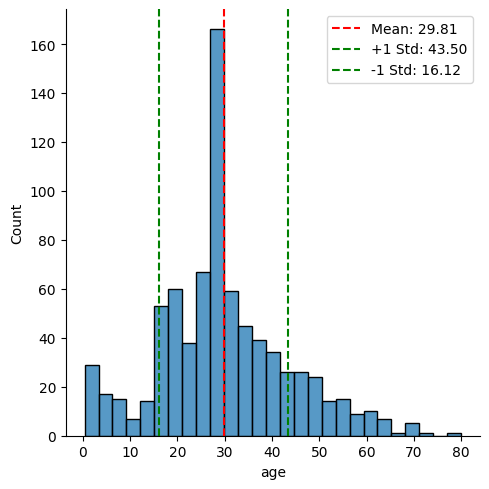

In [32]:
# Zur Veranschaulichung: Hier ist hier die Verteilung der Variable 'age'
mean_before = df['age'].mean()
std_dev_before = df['age'].std()

sns.displot(df, x = 'age')

# Plot the mean as a vertical line
plt.axvline(mean_before, color='red', linestyle='--', label=f'Mean: {mean_before:.2f}')

# Plot the standard deviations as vertical lines
plt.axvline(mean_before + std_dev_before, color='green', linestyle='--', label=f'+1 Std: {mean_before + std_dev_before:.2f}')
plt.axvline(mean_before - std_dev_before, color='green', linestyle='--', label=f'-1 Std: {mean_before - std_dev_before:.2f}')
plt.legend()

In [33]:
# Nun: Standardisierung aller nicht-ordinalen numerischen Spalten im DataFrame mit Pandas-Methoden
numeric_columns = ['fare', 'age']

# Da wir gleich noch eine andere Methode kennenlernen werden erstelle ich eine Kopie vom DataFrame
df_s = df.copy()
df_s[numeric_columns] = (df_s[numeric_columns] - df_s[numeric_columns].mean()) / df_s[numeric_columns].std()


# Überprüfen der standardisierten Daten
display(df_s.head())

,survived,pclass,age,sibsp,parch,fare,embarked_Q,embarked_S,sex_male
0,0,3,-0.570478,1,0,-0.524104,False,True,True
1,1,1,0.598266,1,0,0.703141,False,False,False
2,1,3,-0.278292,0,0,-0.511168,False,True,False
3,1,1,0.379126,1,0,0.354644,False,True,False
4,0,3,0.379126,0,0,-0.508772,False,True,True


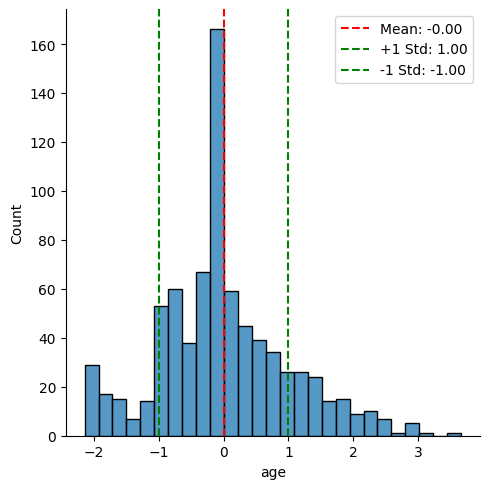

In [34]:
# Zum Vergleich: Die Verteilung der Variable 'age' nach Standardisierung
mean_after = df_s['age'].mean()
std_dev_after = df_s['age'].std()


sns.displot(df_s, x = 'age')

# Plot the mean as a vertical line
plt.axvline(mean_after, color='red', linestyle='--', label=f'Mean: {mean_after:.2f}')

# Plot the standard deviations as vertical lines
plt.axvline(mean_after + std_dev_after, color='green', linestyle='--', label=f'+1 Std: {mean_after + std_dev_after:.2f}')
plt.axvline(mean_after - std_dev_after, color='green', linestyle='--', label=f'-1 Std: {mean_after - std_dev_after:.2f}')
plt.legend()


### Alternative: StandardScaler von Scikit-learn

Obwohl die oben genannte Methode in Pandas gut funktioniert, wird in der Praxis oft der **`StandardScaler`** aus der **Scikit-learn**-Bibliothek verwendet, da dieser sich gut in Machine Learning-Pipelines integrieren lässt. Scikit-learn werden wir in folgenden Notebooks auch noch genauer kennenlernen. Hier soll ein Beispiel genügen:



In [35]:
from sklearn.preprocessing import StandardScaler

# StandardScaler initialisieren
scaler = StandardScaler()

# Nur numerische Spalten standardisieren
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Überprüfen der standardisierten Spalten
df.head()


,survived,pclass,age,sibsp,parch,fare,embarked_Q,embarked_S,sex_male
0,0,3,-0.570843,1,0,-0.524440,False,True,True
1,1,1,0.598648,1,0,0.703591,False,False,False
2,1,3,-0.278470,0,0,-0.511495,False,True,False
3,1,1,0.379369,1,0,0.354871,False,True,False
4,0,3,0.379369,0,0,-0.509097,False,True,True


### Erstellung neuer Features
In unserem Titanic-Beispiel könnte man annehmen, dass Menschen mit mehreren vertrauten Personen an Bord eher Schwierigkeiten hatten, Leute zurückzulassen und daher möglicherweise wertvolle Zeit verloren haben, die sie hätte retten können. Dabei ist es eher unwichtig, welcher Natur diese Beziehungen waren (ob nun Geschwister, Kinder oder Partner). Aufgrunddessen könnte man also aus dem Feature sibsp (Geschwister) und parch (Eltern/Kinder) ein neues Feature `familiengroesse` erstellen. Das ließe sich zum Beispiel so anstellen:

In [36]:
# Neues Feature "familiengroesse" erstellen
df['familiengroesse'] = df['sibsp'] + df['parch']

# Da die anderen Variablen vermutlich keine weitere Aussagekraft für die Überlebensrate haben, könnte man sie nun entfernen.
df = df.drop(columns = ['sibsp', 'parch'])
display(df)

,survived,pclass,age,fare,embarked_Q,embarked_S,sex_male,familiengroesse
0,0,3,-5.708427e-01,-0.524440,False,True,True,1
1,1,1,5.986484e-01,0.703591,False,False,False,1
2,1,3,-2.784699e-01,-0.511495,False,True,False,0
3,1,1,3.793688e-01,0.354871,False,True,False,1
4,0,3,3.793688e-01,-0.509097,False,True,True,0
...,...,...,...,...,...,...,...,...
885,0,3,6.717416e-01,-0.104921,True,False,False,5
887,1,1,-7.901223e-01,-0.088140,False,True,False,0
888,0,3,-2.596792e-16,-0.213756,False,True,False,3
889,1,1,-2.784699e-01,-0.088140,False,False,True,0


## Aufgaben:
- Erstelle eine Funktion, die sowohl die Standardisierung als auch die Normalisierung ([Min-Max-Skalierung](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization))) für numerische Spalten in einem DataFrame anwendet. Vergleiche die beiden Methoden anhand der Verteilung eines Features (z.B. fare).
- Was sind offensichtliche Nachteile des One-Hot-Encoding im Bezug auf die Leistungsfähigkeit von Machine-Learning-Modellen?
- Bei einer kategorischen Variable mit nur zwei Kategorien (wie 'sex') ist One-Hot-Encoding ein bisschen wie mit Kanonen auf Spatzen schießen. Welche einfache Alternative zum One-Hot-Encoding gibt es, die Variable 'sex' in eine binäre Variable umzuwandeln? Experimentiere damit, diese Alternative zu implementieren.
- Untersuche, ob es eine Korrelation zwischen der Variable `familiengroesse`und der Überlebenswahrscheinlichkeit git.

# Zusammenfassung

Wir haben mit einem rohen Datensatz von 891 Zeilen und 15 Spalten angefangen. Wo sind wir gelandet? Bei einem wesentlich schlankeren Datensatz von 782 Zeilen und 8 Spalten, der nur die aussagekräftigsten Features beinhaltet, welche in einem optimalen Format vorhanden sind, um Machine-Learning Algorithmen zu trainieren. Dabei haben wir vieles über Datenverarbeitung in Python gelernt. Hier ist eine kleine Zusammenfassung:

1. **Datenqualität und -inspektion**: Die Qualität der Daten ist entscheidend für die Leistung von Machine Learning-Modellen. Mit `pandas` haben wir den Titanic-Datensatz effizient importiert und inspiziert, um wertvolle Informationen über die Struktur und den Inhalt zu erhalten.

2. **Datenbereinigung**: Überflüssige Spalten wurden entfernt, um den Datensatz zu optimieren und sicherzustellen, dass nur relevante Informationen für das Training des Modells verwendet werden.

3. **Umgang mit fehlenden Werten**: Fehlende Daten können durch Entfernen von Spalten oder Zeilen behandelt werden. Für wenige fehlende Werte, wie in der `embarked`-Spalte, kann eine einfache Ausschlussstrategie ausreichen. Bei der `age`-Spalte ist es sinnvoll, fehlende Werte durch den Durchschnitt zu ersetzen.

4. **Feature Engineering**: Kategorische Variablen wurden durch **One-Hot-Encoding** in numerische Werte umgewandelt, um die Anforderungen der Machine Learning-Modelle zu erfüllen. Dabei ist es wichtig, unnötige Dummy-Variablen zu vermeiden, um Multikollinearität zu verhindern.

5. **Standardisierung**: Die Standardisierung von Features auf eine gemeinsame Skala ist notwendig, um Modelle zu stabilisieren und Verzerrungen zu vermeiden. Sowohl manuelle Methoden als auch der Einsatz von Scikit-learn's `StandardScaler` wurden demonstriert.

6. **Erstellung neuer Features**: Die Kombination von Merkmalen, wie die Erstellung von `familiengroesse` aus `sibsp` und `parch`, kann die Modellvorhersagekraft verbessern.